In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Load error CSVs from errors/ folder
path_prefix = 'errors/'

errors_uji = pd.read_csv(path_prefix + 'errors_UJI.csv', header=None).squeeze()
errors_baseline_uji = pd.read_csv(path_prefix + 'errors_baseline_UJI.csv', header=None).squeeze()
errors_uts = pd.read_csv(path_prefix + 'errors_UTS.csv', header=None).squeeze()
errors_baseline_uts = pd.read_csv(path_prefix + 'errors_baseline_UTS.csv', header=None).squeeze()



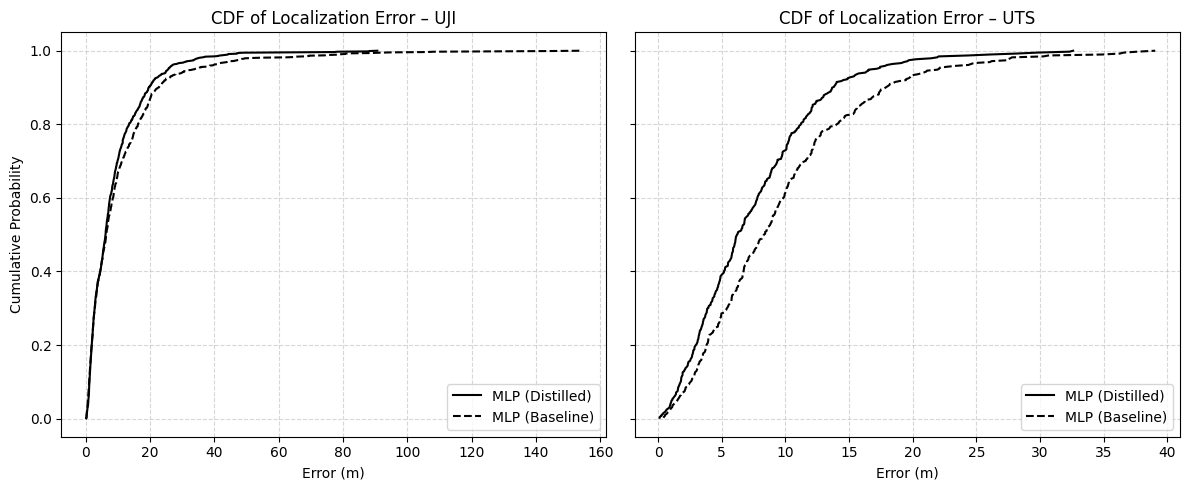

In [23]:
# Prepare figure with side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Line styles for black-and-white plot
line_styles = {
    'MLP (Distilled)': '-',    # Solid line
    'MLP (Baseline)': '--'     # Dashed line
}

# Plot UJI
for label, data in {
    'MLP (Distilled)': errors_uji,
    'MLP (Baseline)': errors_baseline_uji
}.items():
    sorted_err = np.sort(data)
    cdf = np.arange(1, len(sorted_err)+1) / len(sorted_err)
    axes[0].plot(sorted_err, cdf, label=label, color='black', linestyle=line_styles[label])

axes[0].set_title('CDF of Localization Error – UJI')
axes[0].set_xlabel('Error (m)')
axes[0].set_ylabel('Cumulative Probability')
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].legend(loc='lower right')

# Plot UTS
for label, data in {
    'MLP (Distilled)': errors_uts,
    'MLP (Baseline)': errors_baseline_uts
}.items():
    sorted_err = np.sort(data)
    cdf = np.arange(1, len(sorted_err)+1) / len(sorted_err)
    axes[1].plot(sorted_err, cdf, label=label, color='black', linestyle=line_styles[label])

axes[1].set_title('CDF of Localization Error – UTS')
axes[1].set_xlabel('Error (m)')
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.savefig('cdf_side_by_side_bw.png', dpi=300)
plt.show()


In [24]:
# Define percentiles to compute
percentiles = [50, 75, 80, 90, 100]  # 100 = max

# Compute percentiles
results = {
    'UJI - MLP (Distilled)': np.percentile(errors_uji, percentiles),
    'UJI - MLP (Baseline)':  np.percentile(errors_baseline_uji, percentiles),
    'UTS - MLP (Distilled)': np.percentile(errors_uts, percentiles),
    'UTS - MLP (Baseline)':  np.percentile(errors_baseline_uts, percentiles),
}

# Create DataFrame for display
percentile_labels = [f'P{p}' if p < 100 else 'Max' for p in percentiles]
df_percentiles = pd.DataFrame(results, index=percentile_labels).T.round(2)

# Print result
print("Localization Error Percentiles (in meters):")
print(df_percentiles)

# Optionally save to CSV
save_path = path_prefix + 'error_percentiles_summary.csv'
df_percentiles.to_csv(save_path)
print(f"\nSummary saved to: {save_path}")

Localization Error Percentiles (in meters):
                        P50    P75    P80    P90     Max
UJI - MLP (Distilled)  6.18  11.51  13.47  19.66   90.67
UJI - MLP (Baseline)   6.37  13.94  16.24  22.71  154.20
UTS - MLP (Distilled)  6.22  10.21  11.21  13.71   32.60
UTS - MLP (Baseline)   8.36  12.29  14.05  17.88   39.05

Summary saved to: errors/error_percentiles_summary.csv
